## Decision Tree Example

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1.], [2.], [3.], [4.]])
y = np.array([0, 1, 0, 1])


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)
tree.score(X, y)

1.0

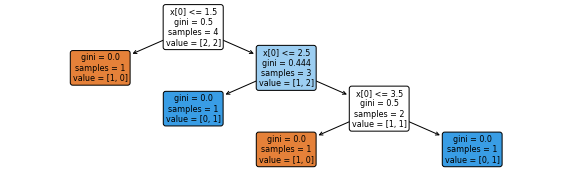

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 3))

plot_tree(tree, 
          filled=True, 
          rounded=True) 

#plt.savefig('tree.pdf')
plt.show()

## Bernoulli variance

In [3]:
data_var = np.var(50*[0] + 50*[1]) # i.e., p = 0.5
data_var

0.25

In [4]:
0.5 * 0.5

0.25

## Scaling

In [5]:
np.random.seed(123)

data = np.random.random_sample(100)
np.var(data)

0.06021177568505576

In [6]:
np.var(data*10)

6.021177568505576

## VarianceThreshold

In [7]:
from sklearn.preprocessing import OneHotEncoder


X = [['blue'], ['green'], ['blue'], ['blue'], ['green'], ['red'], ['blue'], ['green']]
y = [0, 0, 1, 0, 0, 1, 0, 0]

enc = OneHotEncoder(drop='first')
enc.fit(X)
X_ohe = enc.transform(X)
X_ohe.toarray()

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [8]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_ohe)
sel.transform(X_ohe).toarray()

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

# Lasso Path

In [9]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [13]:
lr.intercept_

array([-1.26337795, -1.21605192, -2.37015456])

In [14]:
np.set_printoptions(8)

In [15]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [16]:
lr.coef_

array([[ 1.24566474,  0.18062211,  0.74374745, -1.16141989,  0.        ,
         0.        ,  1.16974408,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54768019,  2.51045129],
       [-1.5368546 , -0.38744172, -0.99520936,  0.3648709 , -0.05937988,
         0.        ,  0.66812953,  0.        ,  0.        , -1.93407338,
         1.23379478,  0.        , -2.2323567 ],
       [ 0.135823  ,  0.1694678 ,  0.3574817 ,  0.        ,  0.        ,
         0.        , -2.43419466,  0.        ,  0.        ,  1.56205371,
        -0.8172951 , -0.49590679,  0.        ]])

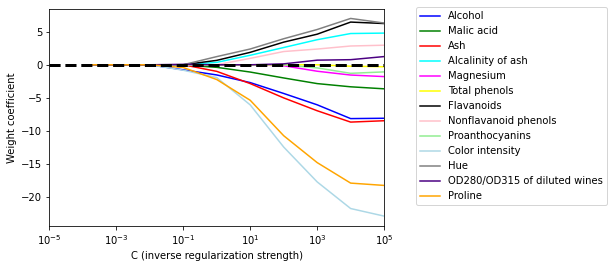

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.savefig('lasso-path.pdf', dpi=300, 
            bbox_inches='tight', pad_inches=0.2)
plt.show()

<br>
<br>

# Random Forest

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [20]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

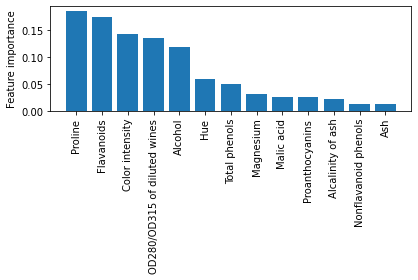

In [21]:
from sklearn.ensemble import RandomForestClassifier



forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = df_wine.columns[1:]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=300)
plt.show()

In [22]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1791095845),
 DecisionTreeClassifier(max_features='sqrt', random_state=2135392491),
 DecisionTreeClassifier(max_features='sqrt', random_state=946286476),
 DecisionTreeClassifier(max_features='sqrt', random_state=1857819720),
 DecisionTreeClassifier(max_features='sqrt', random_state=491263),
 DecisionTreeClassifier(max_features='sqrt', random_state=550290313),
 DecisionTreeClassifier(max_features='sqrt', random_state=1298508491),
 DecisionTreeClassifier(max_features='sqrt', random_state=2143362693),
 DecisionTreeClassifier(max_features='sqrt', random_state=630311759),
 DecisionTreeClassifier(max_features='sqrt', random_state=1013994432),
 DecisionTreeClassifier(max_features='sqrt', random_state=396591248),
 DecisionTreeClassifier(max_features='sqrt', random_state=1703301249),
 DecisionTreeClassifier(max_features='sqrt', random_state=799981516),
 DecisionTreeClassifier(max_features='sqrt', random_state=1666063943),
 DecisionTreeCl

# Recursive Feature Elimination

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Preparation

In [24]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Recursive Feature Selection

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



lr = LogisticRegression(solver='liblinear', random_state=123)

rfe = RFE(estimator=lr, n_features_to_select=5, step=1)
rfe.fit(X_train_std, y_train)

X_train_sub = rfe.transform(X_train_std)

## Which features are selected?

In [28]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
        True,  True, False,  True])

In [29]:
df_wine.columns[1:][rfe.support_]

Index(['Alcohol', 'Flavanoids', 'Color intensity', 'Hue', 'Proline'], dtype='object')

## RFE as Part of a Pipeline

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(RFE(estimator=lr, step=1),
                     KNeighborsClassifier())


parameters = {'rfe__n_features_to_select': range(1, 13), 
              'kneighborsclassifier__n_neighbors': range(1, 10) }

grid = GridSearchCV(pipe, param_grid=parameters, cv=10, n_jobs=-1)
grid.fit(X_train_std, y_train)

print('Best params:', grid.best_params_)
print('Best accuracy:', grid.best_score_)

Best params: {'kneighborsclassifier__n_neighbors': 3, 'rfe__n_features_to_select': 5}
Best accuracy: 0.9916666666666666


In [31]:
# Reduced feature set from grid search

grid.best_estimator_.score(X_test_std, y_test)

1.0

In [32]:
# Full feature set for reference

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.9629629629629629

# Permutation Importance

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Preparation

In [34]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## Permutation importance vs Random Forest impurity-based performance

In [36]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)

forest.fit(X_train, y_train)

print('Training accuracy:', np.mean(forest.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(forest.predict(X_test) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 100.0


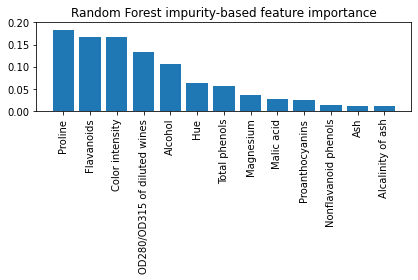

In [37]:
importance_vals = forest.feature_importances_
indices = np.argsort(importance_vals)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Random Forest impurity-based feature importance")
plt.bar(range(X_train.shape[1]), importance_vals[indices])

plt.xticks(range(X_train.shape[1]), df_wine.columns[1:][indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.savefig('1.pdf')
plt.show()

In [38]:
from mlxtend.evaluate import feature_importance_permutation


imp_vals, imp_all = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=50,
    seed=0)

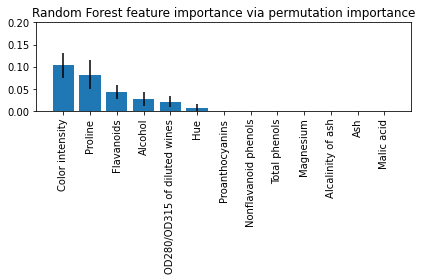

In [39]:
std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X_train.shape[1]), imp_vals[indices], yerr=std[indices])

plt.xticks(range(X_train.shape[1]), df_wine.columns[1:][indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.savefig('2.pdf')
plt.show()

## Scikit-learn

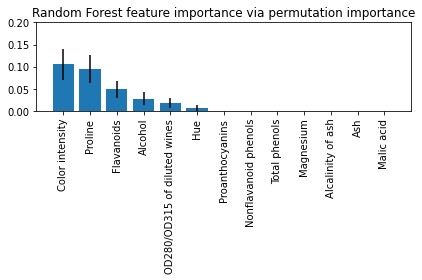

In [40]:
from sklearn.inspection import permutation_importance


forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)

forest.fit(X_train, y_train)

result = permutation_importance(
    estimator=forest,
    X=X_test,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
)


indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(
    range(X.shape[1]),
    result['importances_mean'][indices],
    yerr=result['importances_std'][indices]
)

plt.xticks(range(X.shape[1]), df_wine.columns[1:][indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.savefig('3.pdf')
plt.show()

## Permutation Importance and Using Random Features as a Control

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Preparation

In [42]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## Add random column

In [44]:
import numpy as np


np.random.seed(123)
x1 = np.random.randn(X_train.shape[0]).reshape(-1, 1)
x2 = np.random.randn(X_test.shape[0]).reshape(-1, 1)

In [45]:
X_train_r = np.hstack((X_train, x1))
X_test_r = np.hstack((X_test, x2))
X_test_r.shape

(54, 14)

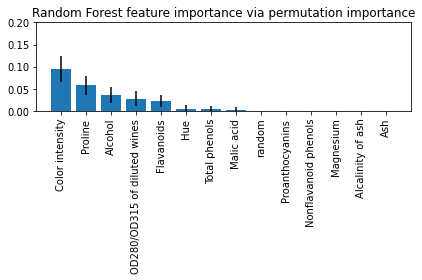

In [46]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)

forest.fit(X_train_r, y_train)

result = permutation_importance(
    estimator=forest,
    X=X_test_r,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
)


indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(
    range(X_train_r.shape[1]),
    result['importances_mean'][indices],
    yerr=result['importances_std'][indices]
)

feature_names = np.array(list(df_wine.columns[1:])+['random'])
plt.xticks(range(X_train_r.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_r.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.savefig('4.pdf')
plt.show()

# Permutation Importance and Dealing with Correlated Features

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
import numpy as np


np.random.seed(123)

y = np.zeros(1000)
y[:500] = 1

x1 = np.random.randn(1000)

x2 = np.empty(1000)
x2[:500] = np.random.randn(500)
x2[500:] = np.random.randn(500)+4

x3 = x2 

X = np.vstack((x3, x2, x1)).swapaxes(1, 0)
X.shape

(1000, 3)

In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=123, 
                     stratify=y)

In [50]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=10,
                                random_state=123,
                                max_features=2)

forest.fit(X_train, y_train)

print('Training accuracy:', np.mean(forest.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(forest.predict(X_test) == y_test)*100)

Training accuracy: 99.71428571428571
Test accuracy: 97.66666666666667


In [51]:
corr = np.corrcoef(X_train.T)
corr.shape

(3, 3)

In [53]:
from mlxtend.evaluate import feature_importance_permutation


imp_vals, imp_all = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=50,
    seed=123)

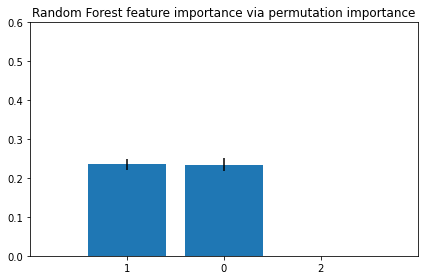

In [54]:
std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X_train.shape[1]), imp_vals[indices], yerr=std[indices])

plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.6])

plt.tight_layout()
plt.savefig('6.pdf')
plt.show()

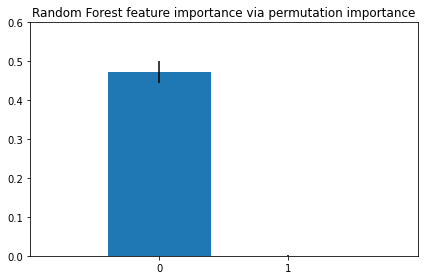

In [55]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

forest = RandomForestClassifier(n_estimators=10,
                                random_state=123,
                                max_features=2)

forest.fit(X_train, y_train)

imp_vals, imp_all = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=50,
    seed=123)

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X_train.shape[1]), imp_vals[indices], yerr=std[indices])

plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.6])

plt.tight_layout()
plt.savefig('7.pdf')
plt.show()

# Sequential Feature Selection

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Preparation

In [57]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

Training accuracy: 98.59154929577466
Test accuracy: 94.44444444444444


## Sequential Feature Selection in Scikit-learn

- Simpler interface without that many bells and whistles
- Use this if you are interested in a specific feature size and don't want to use floating variants

In [62]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='accuracy',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train_std, y_train)

In [63]:
np.arange(X.shape[1])[sfs2.support_]

array([ 0,  6,  9, 10, 12])